In [20]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering as aggClus
from scipy.cluster.hierarchy import dendrogram
import pickle

In [21]:
Iris = datasets.load_iris()
X = Iris.data.T
print(X.shape)

# Num problema de aprend. não supervisionada não teriamos acesso a esta informação
trueClass = Iris.target

(4, 150)


3 clusters por ser 3 classes

In [22]:
kmeans = KMeans(n_clusters=3,init='k-means++',n_init=5,max_iter=500,tol=0.0001,verbose=0,random_state=42)

In [23]:
kmeans = kmeans.fit(X.T)

C = centroides das classes

y = predição com esses centroides

tudo sem olhar para a informação

clustering --> aprendizagem não supervisionada

In [24]:
C = kmeans.cluster_centers_
y = kmeans.labels_
print(C)
print(y)

[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [25]:
print(trueClass)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Como os dados tem 4 dimensões não é possivel observar na sua totalidade

clusters encontrados

centroides marcados com estrela



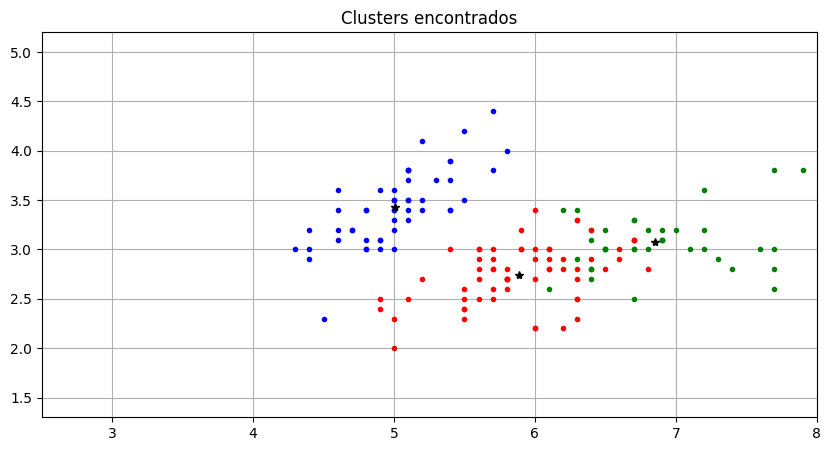

In [26]:
plt.figure(figsize=(10,5))
plt.title('Clusters encontrados')
plt.plot(X[0,y==0],X[1,y==0],'g.')
plt.plot(X[0,y==1],X[1,y==1],'b.')
plt.plot(X[0,y==2],X[1,y==2],'r.')
plt.plot(C[:,0],C[:,1],'k*')
plt.axis([2.5,8,1.3,5.2])
plt.grid()
plt.show()

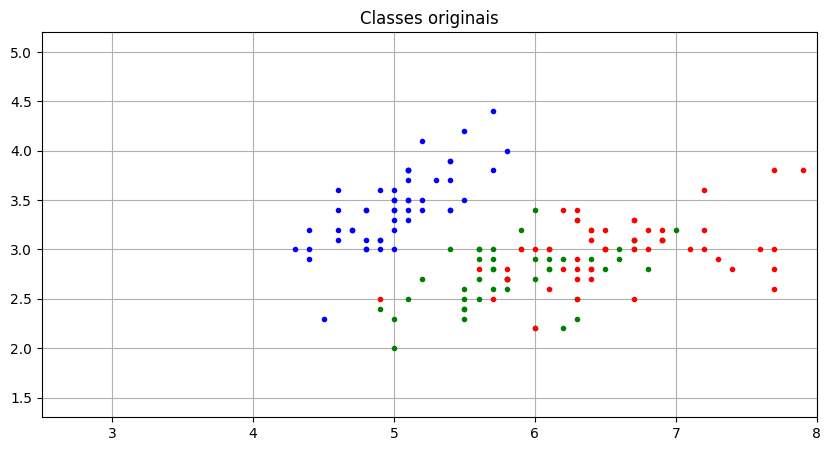

In [27]:
y1 = trueClass
plt.figure(figsize=(10,5))
plt.title('Classes originais')
plt.plot(X[0,y1==0],X[1,y1==0],'b.')
plt.plot(X[0,y1==1],X[1,y1==1],'g.')
plt.plot(X[0,y1==2],X[1,y1==2],'r.')
plt.axis([2.5,8,1.3,5.2])
plt.grid()
plt.show()

In [28]:
def plot_dendogram(model,**kwargs):
    #Crate linkage matrix and then plot the dendogram

    #Create the counts of samples under each node

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count+=1 #leaf node
            else:
                current_count+=counts[child_idx-n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack(
        [model.children_,model.distances_,counts]
    ).astype(float)
    #Plot the corresponding dendogram
    dendrogram(linkage_matrix,**kwargs)

usar sempre ward

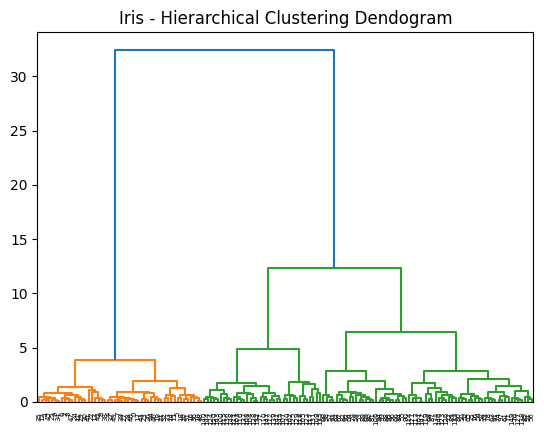

In [29]:
# Colocando distance_threshold=0 garante que obtemos a árvore completa

model = aggClus(distance_threshold=0,n_clusters=None,linkage='ward')
model = model.fit(X.T)
plt.title("Iris - Hierarchical Clustering Dendogram")
#Visualizar todos os 150 níveis do dendograma
plot_dendogram(model,labels=None,truncate_mode = "level",p=150)

In [30]:
file = open("mix9gaus2d.p",'rb')
dados = pickle.load(file)


In [31]:
X = dados

In [32]:
kmeans = KMeans(n_clusters=9,init='k-means++',n_init=5,max_iter=500,tol=0.0001,verbose=0,random_state=42)


In [33]:
kmeans = kmeans.fit(X.T)

In [34]:
C = kmeans.cluster_centers_

In [35]:
C

array([[-8.72786035e-03, -1.22359958e+00],
       [-1.13045667e-02,  1.19965658e+00],
       [ 1.20365108e+00,  1.21484227e+00],
       [-1.20530861e+00,  4.09374279e-03],
       [ 1.21998584e+00,  1.19957607e-03],
       [-2.34255122e-03, -1.77867644e-03],
       [-1.21178679e+00,  1.20821281e+00],
       [-1.20892355e+00, -1.20757208e+00],
       [ 1.20954935e+00, -1.21032884e+00]])

In [36]:
y = kmeans.labels_


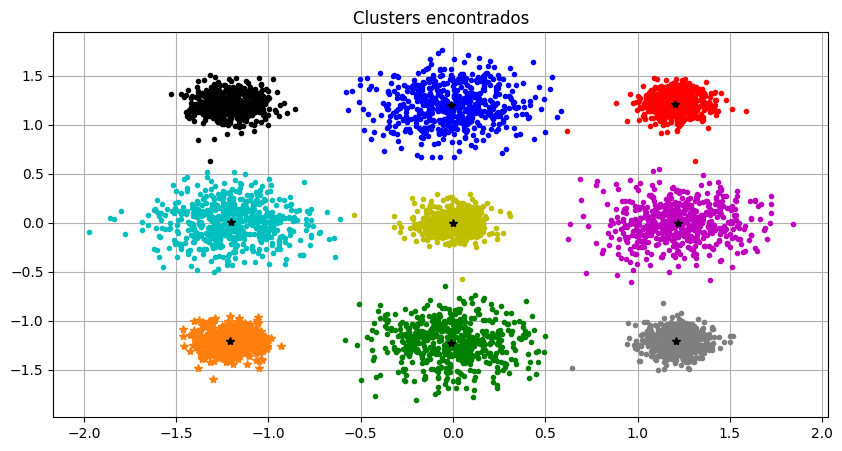

In [37]:
plt.figure(figsize=(10,5))
plt.title('Clusters encontrados')
plt.plot(X[0,y==0],X[1,y==0],'g.')
plt.plot(X[0,y==1],X[1,y==1],'b.')
plt.plot(X[0,y==2],X[1,y==2],'r.')
plt.plot(X[0,y==3],X[1,y==3],'c.')
plt.plot(X[0,y==4],X[1,y==4],'m.')
plt.plot(X[0,y==5],X[1,y==5],'y.')
plt.plot(X[0,y==6],X[1,y==6],'k.')
plt.plot(X[0,y==7],X[1,y==7],color='tab:orange',marker='*',linestyle="")
plt.plot(X[0,y==8],X[1,y==8],color='tab:gray',marker='.',linestyle="")

plt.plot(C[:,0],C[:,1],'k*')
plt.grid()
plt.show()

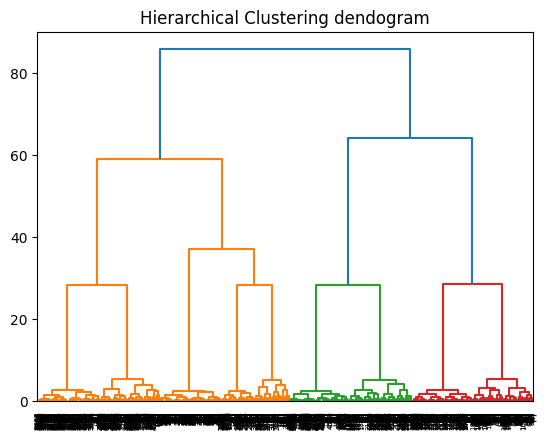

In [38]:
#setting distance_threshold=0 ensures we compute the full tree

model = aggClus(distance_threshold=0,n_clusters=None,linkage='ward')
model = model.fit(X.T)
plt.title("Hierarchical Clustering dendogram")
#plot the top 10 levels of the dendogram
plot_dendogram(model,labels=None,truncate_mode="level",p=10)